In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/MLDL/Progetto/BiseNetv1

Mounted at /content/drive
/content/drive/MyDrive/MLDL/Progetto/BiseNetv1


In [ ]:
!pip install tensorboardX

In [ ]:
!python train.py

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


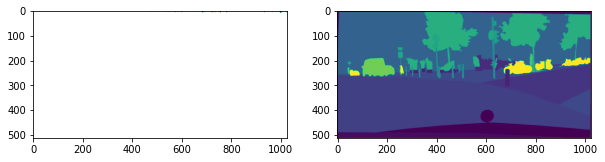

In [18]:
from dataset.Cityscapes import Cityscapes
import matplotlib.pyplot as plt

dataset_train = Cityscapes('../Cityscapes', 'train', [512, 1024])

img, lbl = dataset_train[0]

fig, axarr = plt.subplots(1, 2, figsize=(10,10))
axarr[0].imshow(img.permute(1,2,0))
axarr[1].imshow(lbl.permute(1,2,0))

In [15]:
img.shape

torch.Size([3, 512, 1024])